# Trabalho Prático 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.multicomp as mc
import scikit_posthocs as sp
import statsmodels.api as sm
import statsmodels.stats.stattools as st
import seaborn as sns
import statsmodels.stats.outliers_influence as oi

# Carrega os dados do ficheiro
data = pd.read_csv('files/CO_data.csv', delimiter = ",")

## 4.1. Análise e exploração de dados

### Exercício 1
Construa um gráfico que permita visualizar as emissões totais de CO2 de Portugal no período 1900-2021. Encontre o ano em que foi emitido um valor máximo de CO2.

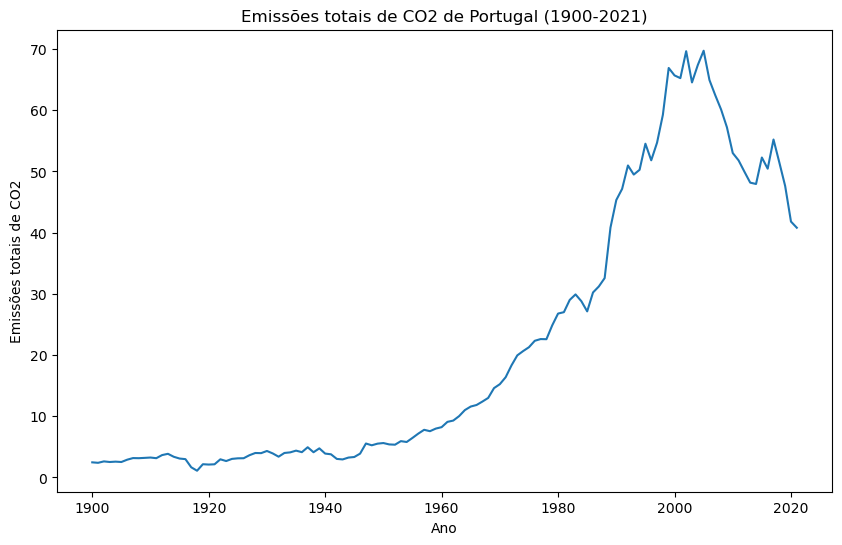

O ano em que foi emitido um valor máximo de CO2 é 2005.


In [30]:
# Filtra os dados para Portugal e para o período de 1900 a 2021
portugal_data = data[(data['country'] == 'Portugal') & (data['year'] >= 1900) & (data['year'] <= 2021)]

# Cria um gráfico para visualizar as emissões totais de CO2 de Portugal no período de 1900 a 2021
plt.figure(figsize=(10, 6))
plt.plot(portugal_data['year'], portugal_data['co2'])
plt.xlabel('Ano')
plt.ylabel('Emissões totais de CO2')
plt.title('Emissões totais de CO2 de Portugal (1900-2021)')
plt.show()

# Encontra o ano em que foi emitido um valor máximo de CO2
max_co2_year = portugal_data['year'][portugal_data['co2'].idxmax()]
print(f'O ano em que foi emitido um valor máximo de CO2 é {max_co2_year}.')

### Exercício 2
Construa um gráfico que permita comparar, no período 1900-2021, as emissões de CO2 de Portugal provenientes de: cimento, carvão, queima (flaring), gas, metano, óxido nitroso e do petróleo.

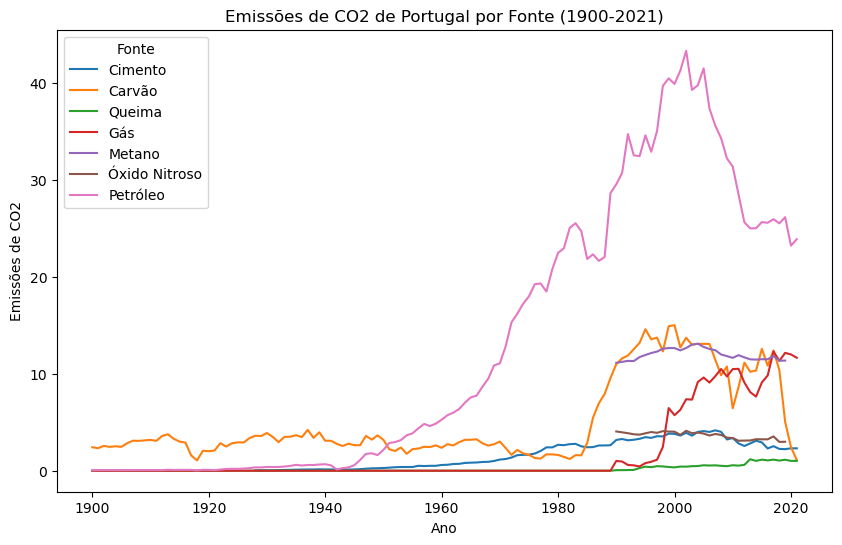

In [31]:
# Filtra os dados para Portugal e para o período de 1900 a 2021
portugal_data = data[(data['country'] == 'Portugal') & (data['year'] >= 1900) & (data['year'] <= 2021)]

plt.figure(figsize=(10, 6))
plt.plot(portugal_data['year'], portugal_data['cement_co2'], label='Cimento')
plt.plot(portugal_data['year'], portugal_data['coal_co2'], label='Carvão')
plt.plot(portugal_data['year'], portugal_data['flaring_co2'], label='Queima')
plt.plot(portugal_data['year'], portugal_data['gas_co2'], label='Gás')
plt.plot(portugal_data['year'], portugal_data['methane'], label='Metano')
plt.plot(portugal_data['year'], portugal_data['nitrous_oxide'], label='Óxido Nitroso')
plt.plot(portugal_data['year'], portugal_data['oil_co2'], label='Petróleo')

plt.xlabel('Ano')
plt.ylabel('Emissões de CO2')
plt.title('Emissões de CO2 de Portugal por Fonte (1900-2021)')
plt.legend(title='Fonte')
plt.show()

### Exercício 3
Construa um gráfico que permita comparar, no período 1900-2021, as emissões de CO2 per capita de Portugal com a Espanha. 

In [32]:
# Filtra os dados para Portugal para o período de 1900 a 2021
portugal_filtered_data = data[(data['country'] == 'Portugal') & (data['year'].between(1900, 2021, 'both')) & (data['co2'].notnull())]

portugal_data = {
    'country': portugal_filtered_data['country'],
    'year': portugal_filtered_data['year'],
    'co2_per_capita': round((portugal_filtered_data['co2'] * 1_000_000) / portugal_filtered_data['population'], 3)
}

portugal_data = pd.DataFrame(portugal_data)

print("Dados sobre as emissões de CO2 per capita de Portugal")
print(portugal_data)

Dados sobre as emissões de CO2 per capita de Portugal
        country  year  co2_per_capita
24456  Portugal  1900           0.456
24457  Portugal  1901           0.439
24458  Portugal  1902           0.477
24459  Portugal  1903           0.455
24460  Portugal  1904           0.462
...         ...   ...             ...
24573  Portugal  2017           5.356
24574  Portugal  2018           5.001
24575  Portugal  2019           4.628
24576  Portugal  2020           4.059
24577  Portugal  2021           3.965

[122 rows x 3 columns]


In [33]:
# Filtra os dados para Espanha para o período de 1900 a 2021
spain_filtered_data = data[(data['country'] == 'Spain') & (data['year'].between(1900, 2021, 'both')) & (data['co2'].notnull())]

spain_data = {
    'country': spain_filtered_data['country'],
    'year': spain_filtered_data['year'],
    'co2_per_capita': round((spain_filtered_data['co2'] * 1_000_000) / spain_filtered_data['population'], 3)
}

spain_data = pd.DataFrame(spain_data)

print("Dados sobre as emissões de CO2 per capita de Espanha")
print(spain_data)

Dados sobre as emissões de CO2 per capita de Espanha
      country  year  co2_per_capita
28381   Spain  1900           0.603
28382   Spain  1901           0.631
28383   Spain  1902           0.656
28384   Spain  1903           0.643
28385   Spain  1904           0.681
...       ...   ...             ...
28498   Spain  2017           5.904
28499   Spain  2018           5.771
28500   Spain  2019           5.343
28501   Spain  2020           4.504
28502   Spain  2021           4.920

[122 rows x 3 columns]


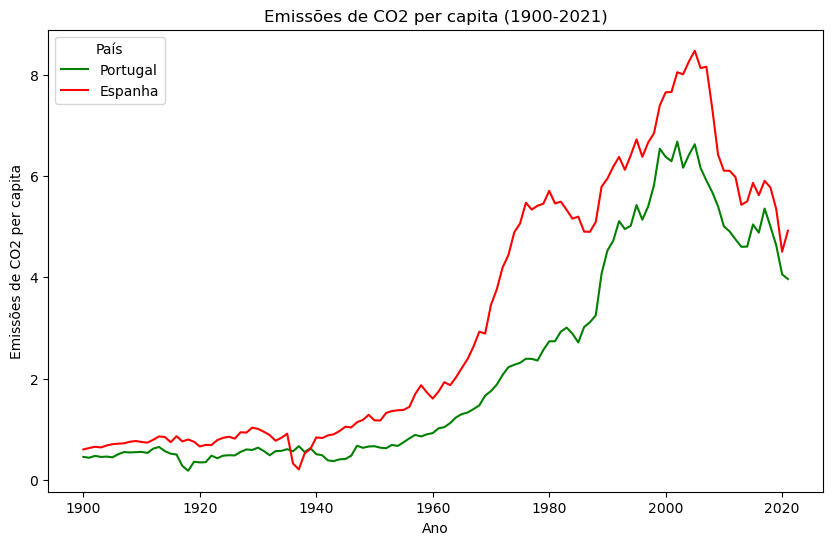

In [34]:
# Criar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(portugal_data['year'], portugal_data['co2_per_capita'], label='Portugal', color='green')
plt.plot(spain_data['year'], spain_data['co2_per_capita'], label='Espanha', color='red')
plt.xlabel('Ano')
plt.ylabel('Emissões de CO2 per capita')
plt.title('Emissões de CO2 per capita (1900-2021)')
plt.legend(title = 'País')
plt.show()

### Exercício 4
Construa um gráfico que permita comparar as emissões de CO2 originadas pelo carvão dos Estados Unidos, China, Índia, União Europeia (a 27) e a Rússia no período 2000-2021.

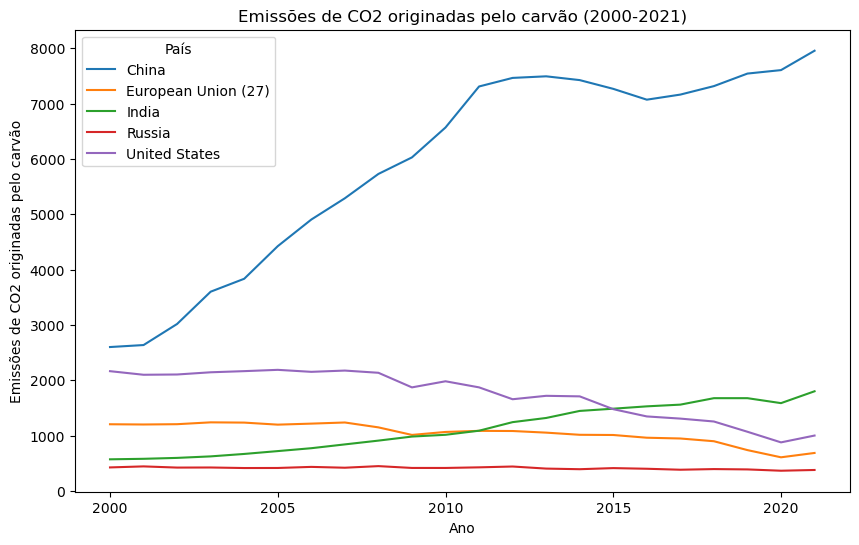

In [35]:
# Filtra os dados para Estados Unidos, China, Índia, União Europeia (a 27) e a Rússia para o período de 2000 a 2021
filtered_data = data[(data['country'].isin(['United States', 'China', 'India', 'European Union (27)', 'Russia'])) & (data['year'] >= 2000) & (data['year'] <= 2021)]

# Agrupa os dados por ano e país
grouped_data = filtered_data.groupby(['year', 'country'])['coal_co2'].sum().unstack()

# Cria um gráfico de linha para comparar as emissões de CO2 originadas pelo carvão entre vários países no período de 2000 a 2021 
plt.figure(figsize=(10, 6))
for country in grouped_data.columns:
    plt.plot(grouped_data.index, grouped_data[country], label = country)

plt.xlabel('Ano')
plt.ylabel('Emissões de CO2 originadas pelo carvão')
plt.title('Emissões de CO2 originadas pelo carvão (2000-2021)')
plt.legend(title = 'País')
plt.show()

### Exercício 5
Construa uma tabela que indique, para cada uma das regiões: Estados Unidos, China, Índia, União Europeia (a 27) e a Rússia, as médias das emissões de CO2 devidas a cimento, carvão, queima (flaring), gas, metano, óxido nitroso e do petróleo no período 2000-2021. (formate as entradas da tabela de forma a terem apenas 3 casas decimais).

In [36]:
# Filtra os dados para Estados Unidos, China, Índia, União Europeia (a 27) e a Rússia para o período de 2000 a 2021
filtered_data = data[(data['country'].isin(['United States', 'China', 'India', 'European Union (27)', 'Russia'])) & (data['year'] >= 2000) & (data['year'] <= 2021)]

# Agrupa os dados por país e calcula a média para cada fonte de emissão
grouped_data = filtered_data.groupby('country')[['cement_co2', 'coal_co2', 'flaring_co2', 'gas_co2', 'methane', 'nitrous_oxide', 'oil_co2']].mean().round(3)

# Reformata a tabela para melhor visualização
grouped_data = grouped_data.reset_index()
pd.set_option('display.expand_frame_repr', False)

# Exibe a tabela
print(grouped_data)

               country  cement_co2  coal_co2  flaring_co2   gas_co2   methane  nitrous_oxide   oil_co2
0                China     599.141  5920.797        1.722   287.021  1015.726        476.530  1116.257
1  European Union (27)      81.488  1049.236       21.132   774.871   407.444        238.482  1374.161
2                India      91.512  1123.795        2.661    92.464   617.360        228.242   469.662
3               Russia      21.837   413.504       43.061   766.698   599.007         58.484   353.289
4        United States      40.055  1750.037       52.728  1364.198   639.154        259.030  2379.692


## 4.2. Inferência Estatística

### Exercício 1
Escolheu-se uma amostra aleatória (sampleyears1) da seguinte forma:
```
seed_value = 100
years = pd.Series([i for i in range(1900, 2021)])
sampleyears1 = years.sample(n=30, replace=False, random_state=seed_value)
```
Use os dados relativos aos anos da amostra sampleyears1 para testar se a média do produto interno bruto (gdp) de Portugal foi superior à média do produto interno bruto da Hungria no período 1900-2021.

In [37]:
seed_value = 100
years = pd.Series([i for i in range(1900,2021)])
sampleyears1 = years.sample(n=30, replace=False, random_state=seed_value)

# Declara-se grau de significância de 5%
alpha = 0.05

As amostras existentes são emparelhadas, pois os dados dos diferentes anos são dependentes devido ao produto interno bruto ser analisado nos mesmos dois países nos diferentes anos.
Primeiro vamos precisar de filtrar os dados para Portugal e Hungria, em que apenas precisamos dos registos onde o gdp não é nulo em ambos os países para o mesmo ano, e onde os anos tomados em consideração fazem parte da amostra aleatória (sampleyears1).

In [38]:
# Filtra os dados para Portugal e Hungria em que apenas se tem os registos que não têm o campo gdp a null
data_portugal = data[(data['country'] == 'Portugal') & (data['gdp'].notnull())]
data_hungary = data[(data['country'] == 'Hungary') & (data['gdp'].notnull())]

# Temos que saber quais são os anos que estão presentes em ambos os datasets
common_years = set(data_portugal['year']).intersection(set(data_hungary['year'])).intersection(sampleyears1)

# Filtra os dados para Portugal e Hungria em que apenas se tem os registos que não têm o campo gdp a null e que têm o ano em comum
data_portugal = data_portugal[data_portugal['year'].isin(common_years)]
data_hungary = data_hungary[data_hungary['year'].isin(common_years)]

np_data_portugal = data_portugal['gdp'].to_numpy()
np_data_hungary = data_hungary['gdp'].to_numpy()

Para podermos utilizar um teste paramétrico (teste-t) (com amostras emparelhadas) devemos verificar primeiro se os dados são provenientes de uma distribuição normal. Para isso, vamos realizar um teste de Shapiro. Tem-se:

H<sub>0</sub>: Os dados seguem uma distribuição normal.

H<sub>1</sub>: Os dados não seguem uma distribuição normal.



In [39]:
samples_dif = np_data_portugal - np_data_hungary
shapiro_test = stats.shapiro(samples_dif)
print('p-value (teste à normalidade de Shapiro):', round(shapiro_test.pvalue, 7))

p-value (teste à normalidade de Shapiro): 0.0001703


Com um nível de significância de 5%, **rejeita-se** a hipótese de que os dados são provenientes de um distribuição normal (rejeita-se H<sub>0</sub>) e consequentemente não devemos utilizar o teste-t.

Para aplicar o teste de Wilcoxon iremos testar a simetria dos dados para verificar se o teste é efetuado à média ou apenas à mediana. Para isso, calcula-se o coeficiente de assimetria (skewness). O valor que obtermos, vai nos fornecer a seguinte informação:
- |skewness| < 0.1 ---> Distribuição simétrica
- 0.1 < |skewness| < 1 ---> Distribuição moderadamente assimétrica
- |skewness| > 1 ---> Distribuição fortemente assimétrica

In [40]:
skewness = round(stats.skew(samples_dif), 5)
print(f"Skewness: {skewness}")

Skewness: 0.60285


**Análise da simetria**

O valor absoluto do coeficiente de assimetria é inferior a 1, mas superior a 0.1, pelo que consideramos os dados moderadamente assimétricos. Consequentemente, consideramos que a mediana é muito semelhante à média e o teste de Wilcoxon pode ser feito á média.

Temos agora o teste de Wilcoxon:

H<sub>0</sub>: η<sub>Portugal</sub> = η<sub>Hungria</sub> **vs** H<sub>1</sub>: η<sub>Portugal</sub> > η<sub>Hungria</sub>

In [41]:
statistic, p_value = stats.wilcoxon(np_data_portugal, np_data_hungary, alternative = 'greater')
print(f'Test statistic: {statistic}')
print(f'P-value: {round(p_value, 5)}')

Test statistic: 234.0
P-value: 0.07136


Não há evidência estatística que a média do produto interno bruto (gdp) de Portugal foi superior à média do produto interno bruto da Hungria no período 1900-2021, com um nível de significância de 5%. Logo, não se rejeita H<sub>0</sub>.

### Exercício 2
Escolheram-se duas amostras aleatórias (**sampleyears2** e **sampleyears3**) da seguinte forma:
```
years = pd.Series([i for i in range(1900, 2021)])
seed_value = 55
sampleyears2 = years.sample(n=12, replace=False, random_state=seed_value)
seed_value = 85
sampleyears3 = years.sample(n=12, replace=False, random_state=seed_value)
```
Use os dados relativos aos anos da amostra **sampleyears2** para Portugal e os dados relativos aos anos da amostra **sampleyears3** para a Hungria para testar se a média do produto interno bruto (gdp) de Portugal foi superior à média do produto interno bruto da Hungria no período 1900-2021.

In [3]:
# Escolheram-se duas amostras aleatórias (sampleyears2 e sampleyears3) da seguinte forma
years = pd.Series([i for i in range(1900, 2021)])
seed_value = 55
sampleyears2 = years.sample(n=12, replace=False, random_state=seed_value)
seed_value = 85
sampleyears3 = years.sample(n=12, replace=False, random_state=seed_value)

# Declara-se grau de significância de 5%
alpha = 0.05

In [4]:
# Filtra os dados para Portugal usando sampleyears2 e para Hungria usando sampleyears3
data_portugal = data[(data['country'] == 'Portugal') & (data['year'].isin(sampleyears2))]
data_hungary = data[(data['country'] == 'Hungary') & (data['year'].isin(sampleyears3))]

# Executando o teste de Shapiro-Wilk para verificar a normalidade
statistic_portugal, p_value_portugal = stats.shapiro(data_portugal['gdp'].dropna())
statistic_hungary, p_value_hungary = stats.shapiro(data_hungary['gdp'].dropna())

# Exibindo os resultados do teste de Shapiro-Wilk
print("Valor-p de Portugal:", p_value_portugal)
print("Valor-p da Hungria:", p_value_hungary)

if p_value_portugal < alpha:
    print("A distribuição dos dados de Portugal não é normal")
else:
    print("A distribuição dos dados de Portugal é normal")

if p_value_hungary < alpha:
    print("A distribuição dos dados da Hungria não é normal")
else:
    print("A distribuição dos dados da Hungria é normal")

Valor-p de Portugal: 0.1150248022001375
Valor-p da Hungria: 0.18750692545336695
A distribuição dos dados de Portugal é normal
A distribuição dos dados da Hungria é normal


**Como ambas as ditribuições são normais pode-se utilizar o teste de levene.**

In [19]:
# Devemos começar por fazer um teste de Levene para decidir se as variâncias são iguais ou diferentes.
statistic, p_value = stats.levene(data_portugal['gdp'], data_hungary['gdp'], nan_policy='omit')
print("P-value levene:", round(p_value,5))

# Se o valor de prova for inferior ao índice de significância considerado rejeita-se a hipótese nula do teste de levene.
if p_value < alpha:
    print("Rejeitamos a hipótese nula do teste de levene.")

# Se o valor de prova for superior ao índice de significância considerado não se rejeita-se a hipótese nula do teste de levene.
else:
    print("Não se rejeita a hipótese nula do teste de levene")

    # Devemos efetuar um teste bilateral às médias de duas populações com variâncias desconhecidas mas iguais.
    statistic, p_value = stats.ttest_ind(data_portugal['gdp'], data_hungary['gdp'], equal_var=True, nan_policy='omit', alternative='less')
    print("P-value ttest_ind:", round(p_value,5))
    
    # Se o valor de prova for inferior ao índice de significância considerado rejeita-se a hipótese nula do teste t.
    if p_value < alpha:
        print("Rejeitamos a hipótese nula. Há evidências que a média do GDP de Portugal é superior á média do GDP da Hungria.")

    # Se o valor de prova for superior ao índice de significância considerado não se rejeita-se a hipótese nula do teste t.
    else:
        print("Não há evidências estatísticas para rejeitar a hipótese nula. Não podemos concluir que a média do GDP de Portugal é superior á média do GDP da Hungria.")
    

P-value levene: 0.56659
Não se rejeita a hipótese nula do teste de levene
P-value ttest_ind: 0.53153
Não há evidências estatísticas para rejeitar a hipótese nula. Não podemos concluir que a média do GDP de Portugal é superior á média do GDP da Hungria.


### Exercício 3
Use os anos da amostra **sampleyears2** (ver questão anterior) para testar se há diferenças significativas nas emissões totais de CO2 entre as regiões: Estados Unidos, Rússia, China, India e União Europeia (a 27). **Nota:** Caso necessário efetue uma análise **post-hoc** adequada.

In [45]:
# Define as regiões a serem analisados
countries = ['United States', 'Russia', 'China', 'India', 'European Union (27)']

# Filtra os dados para apenas os anos na amostra sampleyears2 e as regiões especificadas
sample_data  = data[data['year'].isin(sampleyears2) & data['country'].isin(countries)]

Vamos realizar o teste de *Shapiro-Wilk* para verificar a normalidade das emissões de CO2 para cada região. A normalidade é uma suposição importante em muitos testes estatísticos, e se essa suposição for violada, os resultados desses testes podem não ser válidos.

In [46]:
# Inicializa um dicionário para armazenar os resultados do teste de normalidade
normality = {}

# Realiza o teste de Shapiro-Wilk para verificar a normalidade das emissões de CO2 para cada região
print('Resultado do teste Shapiro-Wilk:')
for country in countries:
    _, p_value = stats.shapiro(sample_data[sample_data['country'] == country]['co2'])
    
    # Se o p-valor for maior que o nível de significância (alpha), a distribuição é considerada normal
    if p_value > alpha:
        print(f'{country}: Distribuição é normal')
        normality[country] = True
    else:
        print(f'{country}: Distribuição não é normal')
        normality[country] = False

Resultado do teste Shapiro-Wilk:
United States: Distribuição não é normal
Russia: Distribuição é normal
China: Distribuição não é normal
India: Distribuição não é normal
European Union (27): Distribuição não é normal


A partir do teste de *Shapiro-Wilk*, podemos concluir que as emissões de CO2 para a Rússia seguem uma distribuição normal, enquanto as emissões para os Estados Unidos, China, Índia e União Europeia (a 27) não seguem uma distribuição normal.

Se todas as distribuições são normais, realizamos o teste *ANOVA*. Caso contrário, realizamos o teste *Kruskal-Wallis*. Estes testes são usados para determinar se existem diferenças significativas entre as médias de três ou mais grupos independentes. No nosso caso, estamos interessados em saber se as emissões médias de CO2 diferem significativamente entre as regiões.

In [47]:
# Adiciona os dados de emissões de CO2 de cada região à lista de dados a serem testados
data_to_test = []
for country in countries:
    data_to_test.append(sample_data[sample_data['country'] == country]['co2'])

# Se todas as distribuições são normais, realiza o teste ANOVA
if all(normality.values()):
    f_value, p_value = stats.f_oneway(*data_to_test)
    print('\nResultado do teste ANOVA:')
    print('F-valor:', round(f_value, 5))
    print('P-valor:', round(p_value, 5))
    
    # Se o p-valor é menor que o nível de significância, realiza o teste post-hoc de Tukey
    if p_value < alpha:
        print('Há diferenças significativas nas emissões de CO2 entre as regiões')
        
        posthoc_result = mc.pairwise_tukeyhsd(endog = sample_data['co2'], groups = sample_data['country'], alpha = alpha)
        print('\nResultado do teste post-hoc de Tukey:')
        print(posthoc_result) 
    else:
        print('Não há diferenças significativas nas emissões de CO2 entre as regiões')

# Se alguma das distribuições não é normal, realiza o teste Kruskal-Wallis
else:
    h_value, p_value = stats.kruskal(*data_to_test)
    print('\nResultado do teste Kruskal-Wallis:')
    print('H-valor:', round(h_value, 5))
    print('P-valor:', round(p_value, 5))
    
    # Se o p-valor é menor que o nível de significância, realiza o teste post-hoc de Dunn
    if p_value < alpha:
        print('Há diferenças significativas nas emissões de CO2 entre as regiões')
        
        posthoc_result = sp.posthoc_dunn(sample_data, val_col = 'co2', group_col = 'country', p_adjust = 'holm')
        print('\nResultado do teste post-hoc de Dunn:')
        print(posthoc_result)
    else:
        print('Não há diferenças significativas nas emissões de CO2 entre as regiões')


Resultado do teste Kruskal-Wallis:
H-valor: 21.47705
P-valor: 0.00025
Há diferenças significativas nas emissões de CO2 entre as regiões

Resultado do teste post-hoc de Dunn:
                        China  European Union (27)     India    Russia  United States
China                1.000000             0.685863  0.397824  0.685863       0.102012
European Union (27)  0.685863             1.000000  0.016236  0.340554       0.685863
India                0.397824             0.016236  1.000000  0.685863       0.000272
Russia               0.685863             0.340554  0.685863  1.000000       0.023025
United States        0.102012             0.685863  0.000272  0.023025       1.000000


Como nem todas as distribuições são normais, realizamos o teste *Kruskal-Wallis*. O resultado do teste indica que há diferenças significativas nas emissões de *CO2* entre as regiões.

Realizamos então o teste *post-hoc* de *Dunn* para identificar onde estas diferenças ocorrem. A tabela resultante mostra-nos os *p-valores* ajustados para cada par de regiões. Um valor menor que 0.05 indica uma diferença significativa.

Por exemplo, observamos uma diferença significativa nas emissões de CO2 entre:
- Índia e União Europeia (a 27)
- Índia e Estados Unidos
- Rússia e Estados Unidos

## 4.3. Correlação e Regressão

### Exercício 1

Use os dados da emissão de CO2 provenientes do carvão dos anos compreendidos entre 2000 e 2021 para construir uma tabela de correlação entre as regiões: África (’Africa’), Ásia (’Asia’), América do Sul (’South America’), América do Norte (’North America’), Europa (’Europe’) e Oceania(’Oceania’).

country   Africa       Asia    Europe  North America  Oceania  South America
year                                                                        
2000     370.263   4273.769  1965.518       2323.645  190.885         79.037
2001     371.990   4356.850  1997.211       2260.485  196.182         72.540
2002     361.126   4807.693  1974.031       2267.507  197.303         71.300
2003     390.897   5510.933  2019.729       2316.448  203.956         76.500
2004     417.522   5837.408  2004.665       2324.201  210.942         76.847
2005     412.797   6525.003  1960.217       2356.772  210.285         78.260
2006     419.151   7115.816  2037.609       2322.241  213.906         80.117
2007     430.315   7667.769  2038.500       2345.151  210.895         83.729
2008     454.084   8175.789  1964.492       2294.236  213.596         90.600
2009     423.780   8545.598  1747.300       2010.687  213.091         75.971
2010     429.905   9245.113  1815.784       2133.880  207.202         94.736

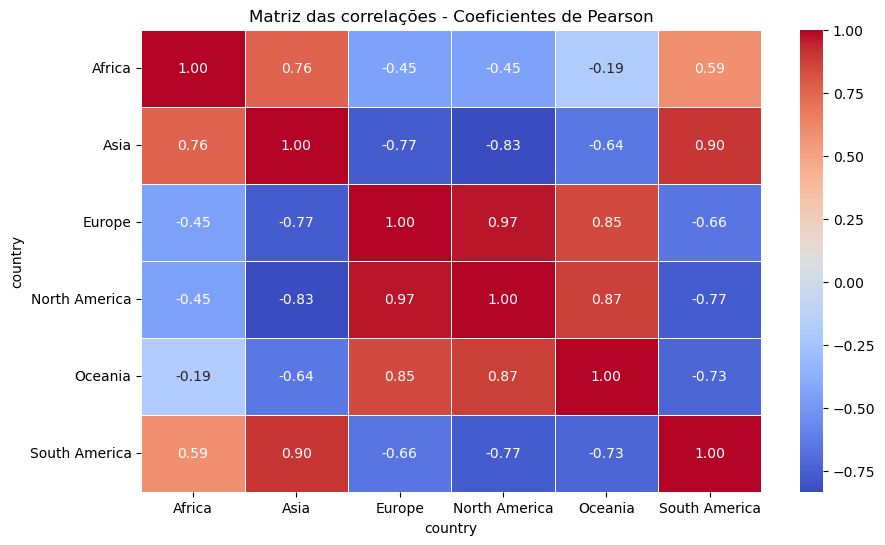

In [48]:
# Define as regiões a serem analisadas
countries = ['Africa', 'Asia', 'South America', 'North America', 'Europe', 'Oceania']

# Filtra os dados para apenas os anos [2000, 2021] e as regiões especificadas
filtered_data = data[data['year'].between(2000, 2021, inclusive='both') & data['country'].isin(countries)]

# Agrupa os dados por ano e país em relação ao coal_co2
grouped_data = filtered_data.groupby(['year', 'country'])['coal_co2'].sum().unstack()

print(grouped_data)

# Existem dados de coal_co2 para todos os países e anos. Caso não houvesse em algum dos anos os dados de coal_co2 para algum dos países, poderíamos remover os dados desse ano em todos os países

correlation_matrix = grouped_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz das correlações - Coeficientes de Pearson')
plt.show()

Através da matriz de correlações anterior, torna-se possível fornecem perceções úteis sobre a relação entre as emissões de CO<sub>2</sub> provenientes do carvão nas diferentes regiões.

Os valores lá representados variam entre -1 e 1, em que:
- valores próximos de -1: as regiões X e Y estão, negativamente, fortemente correlacionadas;
- valores próximos de 1: as regiões X e Y estão, positivamente, fortemente correlacionadas;
- valores próximos de 0: então as regiões X e Y estão fracamente correlacionadas.

### Exercício 2

Considere as variáveis independentes:
- X1 - Emissão de CO2 provenientes do carvão nos anos pares do século XXI na Alemanha
- X2 - Emissão de CO2 proveniente do carvão nos anos pares do século XXI na Rússia
- X3 - Emissão de CO2 proveniente do carvão nos anos pares do século XXI na França
- X4 - Emissão de CO2 proveniente do carvão nos anos pares do século XXI em Portugal

e a variável dependente:
- Y - Emissão de CO2 provenientes do carvão nos anos pares do século XXI na Europa (’Europe’) 


In [49]:
# Seleciona apenas os dados dos países da Europa e dos anos 2000 a 2999 e pares
X1 = data[(data['country'] == 'Germany') & (data['year'] >= 2000) & (data['year'] <= 2999) & (data['year'] % 2 == 0)].reset_index(drop=True)
X2 = data[(data['country'] == 'Russia') & (data['year'] >= 2000) & (data['year'] <= 2999) & (data['year'] % 2 == 0)].reset_index(drop=True)
X3 = data[(data['country'] == 'France') & (data['year'] >= 2000) & (data['year'] <= 2999) & (data['year'] % 2 == 0)].reset_index(drop=True)
X4 = data[(data['country'] == 'Portugal') & (data['year'] >= 2000) & (data['year'] <= 2999) & (data['year'] % 2 == 0)].reset_index(drop=True)
Y = data[(data['country'] == 'Europe') & (data['year'] >= 2000) & (data['year'] <= 2999) & (data['year'] % 2 == 0)].reset_index(drop=True)

# Seleciona apenas a variável independente 'coal_co2' para cada país
X1 = X1['coal_co2']
X2 = X2['coal_co2']
X3 = X3['coal_co2']
X4 = X4['coal_co2']
Y = Y['coal_co2']

#### Alínea a)

Encontre o modelo de regressão linear.

In [50]:
# Concatena todas as variáveis independentes em um único DataFrame
X = pd.concat([X1, X2, X3, X4], axis=1)

# Renomeia as linhas do DataFrame
X.columns = ['Germany', 'Russia', 'France', 'Portugal']

# Adiciona uma linha de constante para o termo de intercetação
X = sm.add_constant(X)

# Ajusta o modelo de regressão linear usando OLS (Ordinary Least Squares)
model = sm.OLS(Y, X).fit()

# Imprime o sumário do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               coal_co2   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     93.23
Date:                Sun, 07 Apr 2024   Prob (F-statistic):           1.57e-05
Time:                        01:24:02   Log-Likelihood:                -53.778
No. Observations:                  11   AIC:                             117.6
Df Residuals:                       6   BIC:                             119.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -417.1743    328.717     -1.269      0.2

c:\Users\ti_ma\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  k, _ = kurtosistest(a, axis)


#### Alínea b)

Verifique as condições sobre os resíduos.

Calculamos os resíduos do modelo. Os resíduos são a diferença entre os valores observados e os valores previstos pelo modelo, sendo útil para verificar se o modelo está bem ajustado aos dados.

Verificamos se os resíduos seguem uma distribuição normal. Isto é importante porque muitos testes estatísticos assumem que os resíduos são normalmente distribuídos. Para fazer esta verificação usamos um gráfico *Q-Q* e o teste de *Shapiro-Wilk*.

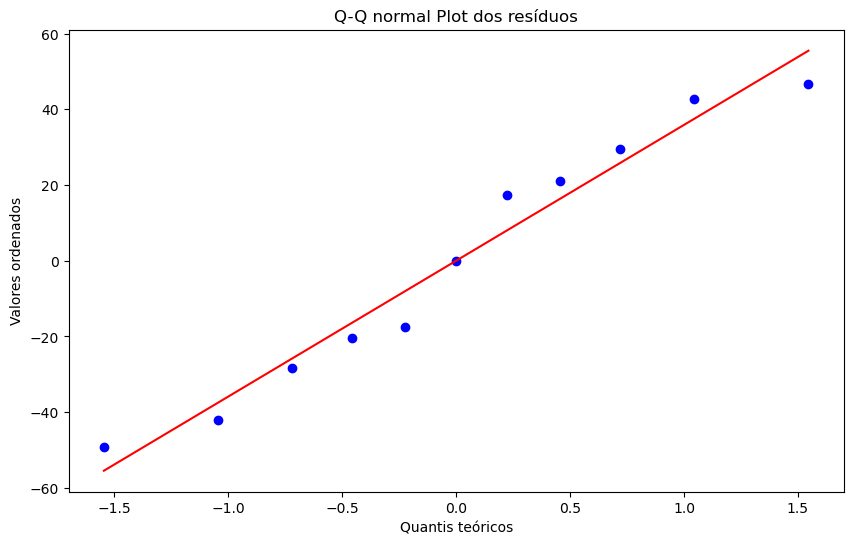

Resultado do teste Shapiro-Wilk (P-valor): 0.5273
Os resíduos seguem uma distribuição normal


In [51]:
# Calcula os resíduos
residuals = model.resid

# Cria um gráfico Q-Q para verificar se os resíduos seguem uma distribuição normal
plt.figure(figsize = (10, 6))
stats.probplot(residuals, dist = "norm", plot = plt)
plt.xlabel('Quantis teóricos')
plt.ylabel('Valores ordenados')
plt.title('Q-Q normal Plot dos resíduos')
plt.show()

# Realiza o teste Shapiro-Wilk para verificar a normalidade dos resíduos
_, p_value = stats.shapiro(residuals)
print('Resultado do teste Shapiro-Wilk (P-valor):', round(p_value, 5))

if p_value < 0.05:
    print("Os resíduos não seguem uma distribuição normal")
else:
    print("Os resíduos seguem uma distribuição normal")

A partir do teste de *Shapiro-Wilk*, podemos concluir que verifica-se a condição de normalidade, pois o *p-value* é superior a 0.05.

A homocedasticidade é a propriedade de ter uma variância constante. Se os resíduos não são homocedásticos, isso pode indicar que o modelo não está bem ajustado aos dados. Usamos um gráfico de resíduos versus os valores previstos para verificar a homocedasticidade.

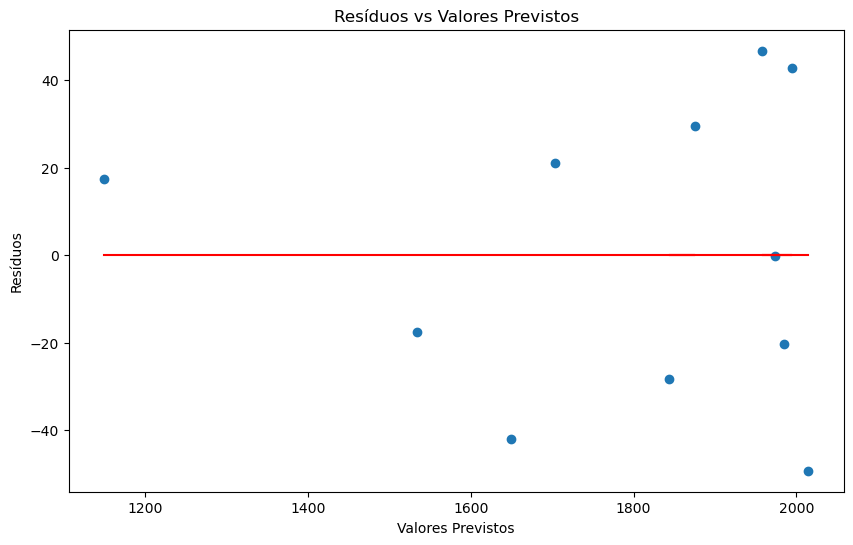

In [52]:
# Obtêm os valores previstos do modelo
fitted_values = model.predict()

# Cria um gráfico de resíduos vs valores previstos para verificar a homocedasticidade
plt.figure(figsize = (10, 6))
plt.scatter(fitted_values, residuals)
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.title('Resíduos vs Valores Previstos')
plt.plot(fitted_values, [0]*len(fitted_values), color = 'r')
plt.show()

Deve haver simetria relativamente à reta y = 0 e não existir tendência, como podemos verificar a condição de homocedasticidade não é verificada.

A autocorrelação é a correlação de uma série de tempo com uma versão atrasada de si mesma. Se os resíduos são autocorrelacionados, isso pode indicar que o modelo não está capturando alguma informação nos dados. Usamos o teste de *Durbin-Watson* para verificar a autocorrelação.

In [53]:
# Realiza o teste de Durbin-Watson para verificar a autocorrelação dos resíduos
durbinWatson = st.durbin_watson(residuals)
print('Estatística de Durbin-Watson:', round(durbinWatson, 5))

if durbinWatson < 1.5:
    print('Sinais de autocorrelação positiva')
    print('Condição não verificada')
elif durbinWatson > 2.5:
    print('Condição não verificada')
else:
    print('Sem autocorrelação ou pequenos sinais')
    print('Condição verificada')

Estatística de Durbin-Watson: 1.57656
Sem autocorrelação ou pequenos sinais
Condição verificada


Não há autocorrelação nos resíduos, como indicado pela estatística de *Durbin-Watson*.

#### Alínea c)

Verifique se existe colinearidade (VIF).

In [54]:
# Remova a coluna "const" dos dados
X_without_const = X.drop(columns=['const'])
    
vif_res = pd.DataFrame()
vif_res["variaveis"] = X_without_const.columns 
vif_res["VIF"] = [oi.variance_inflation_factor(X_without_const.values, i)
                  for i in range(len(X_without_const.columns))]
print(vif_res)

  variaveis         VIF
0   Germany  328.558342
1    Russia  138.679515
2    France   56.656309
3  Portugal   40.490640


#### Alínea d)

Comente o modelo obtido tendo em conta todas as características relevantes para a qualidade do modelo.

O R-squared quantifica o quanto as variações nas variáveis independentes estão associadas às variações na variável dependente. Neste caso, o R-squared é alto (0.984), o que sugere que o modelo explica 98.4% da variabilidade na variável dependente (coal_co2). Isso indica que o modelo tem um bom ajuste aos dados.

O adj. R-squared é uma versão corrigida do R-squared que leva em consideração o número de variáveis independentes no modelo de regressão. Neste caso, o valor é 0.974, o que ainda é alto e indica que o modelo provavelmente não está superestimando devido à inclusão de muitos preditores.

O R-squared ser mais alto que o adj. R-squared significa que o modelo inclui variáveis independentes adicionais que não contribuem significativamente para explicar a variabilidade na variável dependente.

O F-statistic avalia se pelo menos uma das variáveis independentes incluídas no modelo tem um efeito significativo na variável dependente. O valor alto do F-statistic (93.23) e a baixa probabilidade (1.57e-05) associada sugerem que o modelo como um todo é significativo.

Os valores na coluna coef significam um aumento de unidades em "coal_co2" para cada unidade de aumento.

A coluna P>|t| diz-nos se um coeficiente é estatisticamente significativo, ou seja se P>|t| é menor que alfa (0.05).

O Omnibus é um teste de normalidade geral, enquanto o Prob(Omnibus) é um teste de normalidade específico. O Omnibus é um teste de qui-quadrado que compara a distribuição dos valores de resíduos com uma distribuição normal. O Prob(Omnibus) dá a probabilidade de que a distribuição dos resíduos seja normal. Se o valor de Prob(Omnibus) for menor que 0,05, a distribuição dos resíduos não é normal. Se o valor de Prob(Omnibus) for maior que 0,05, a distribuição dos resíduos é normal. Como Prob(Omnibus) é de 0,359, a distribuição dos resíduos é normal.

O Skew mede a assimetria dos resíduos. Um valor perto de zero como -0.026 significa que os resíduos têm uma distribuição simétrica.

O Kurtosis mede a forma da distribuição dos resíduos. Um valor de 1.631 significa que a distribuição dos resíduos é um pouco mais acentuada nas caudas.

O Durbin-Watson mede a autocorrelação dos resíduos, o valor de 1.577 sugere que há pouca autocorrelação nos residuos.

O Jarque-Bera (JB) mede normalidade dos resíduos. Como o Jarque-Bera (JB) (0.860) é maior que o Prob(JB) (0.650), a distribuição dos resíduos é normal.

O Cond. no. representa a multicolinearidade entre as variáveis independentes no modelo. Como o número é maior que 30 (1.35e4), há uma alta multicolinearidade.

#### Alínea e)

Estime a emissão de CO2 proveniente do carvão na Europa no ano 2015 e compare com o valor real.

Usamos o modelo para prever a emissão de CO2 na Europa em 2015 e comparamos com o valor real.

In [55]:
# Valores das variáveis independentes para o ano de 2015
X1_2015 = data[(data['country'] == 'Germany') & (data['year'] == 2015)]['coal_co2'].reset_index(drop=True)
X2_2015 = data[(data['country'] == 'Russia') & (data['year'] == 2015)]['coal_co2'].reset_index(drop=True)
X3_2015 = data[(data['country'] == 'France') & (data['year'] == 2015)]['coal_co2'].reset_index(drop=True)
X4_2015 = data[(data['country'] == 'Portugal') & (data['year'] == 2015)]['coal_co2'].reset_index(drop=True)

# Cria um DataFrame com os valores das variáveis independentes incluindo uma constante para o termo de intercepção do modelo
X_2015 = pd.DataFrame({'const': 1, 'X1': X1_2015, 'X2': X2_2015, 'X3': X3_2015, 'X4': X4_2015})

# Usa o modelo para fazer a previsão
Y_2015_pred = model.predict(X_2015)

print('Emissão de CO2 proveniente do carvão na Europa no ano 2015 (em milhões de toneladas):')
print('Valor estimado:', round(Y_2015_pred.iloc[0], 5))

# Valor real das emissões de CO2 provenientes do carvão na Europa no ano de 2015
Y_2015_real = data[(data['country'] == 'Europe') & (data['year'] == 2015)]['coal_co2']
print('Valor real:', round(Y_2015_real.iloc[0], 5))

# Calcula o erro absoluto entre o valor estimado e o valor real
print('Erro absoluto:', round(abs(Y_2015_pred.iloc[0] - Y_2015_real.iloc[0]), 5))

Emissão de CO2 proveniente do carvão na Europa no ano 2015 (em milhões de toneladas):
Valor estimado: 1713.04721
Valor real: 1702.246
Erro absoluto: 10.80121


O modelo forneceu uma previsão próxima do valor real, indicando que pode ser útil para prever futuras emissões de CO2.